In [21]:
import cv2
from pathlib import Path
import os
import re
import numpy as np
import matplotlib.pyplot as plt


In [2]:
img_dir = Path("Book images/REsized")
img_paths = list(img_dir.iterdir())
img_paths.sort(key=lambda x: int(x.stem))
img_paths

[WindowsPath('Book images/REsized/1.png'),
 WindowsPath('Book images/REsized/2.png'),
 WindowsPath('Book images/REsized/3.png'),
 WindowsPath('Book images/REsized/4.png'),
 WindowsPath('Book images/REsized/5.png'),
 WindowsPath('Book images/REsized/6.png'),
 WindowsPath('Book images/REsized/7.png'),
 WindowsPath('Book images/REsized/8.png'),
 WindowsPath('Book images/REsized/9.png'),
 WindowsPath('Book images/REsized/10.png'),
 WindowsPath('Book images/REsized/11.png'),
 WindowsPath('Book images/REsized/12.png'),
 WindowsPath('Book images/REsized/13.png'),
 WindowsPath('Book images/REsized/14.png'),
 WindowsPath('Book images/REsized/15.png'),
 WindowsPath('Book images/REsized/16.png'),
 WindowsPath('Book images/REsized/17.png'),
 WindowsPath('Book images/REsized/18.png'),
 WindowsPath('Book images/REsized/19.png'),
 WindowsPath('Book images/REsized/20.png'),
 WindowsPath('Book images/REsized/21.png'),
 WindowsPath('Book images/REsized/22.png'),
 WindowsPath('Book images/REsized/23.png'

In [30]:
def strip_outermost_edge(img_path: Path, page_type: bool):
#     page type False = even
    img = cv2.imread(img_path)
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(img_grey)
    # plt.show()
    # cv2.resize(img, (width, 1500), interpolation = cv2.INTER_LINEAR)
    height, width= img_grey.shape
    
    if page_type:
        sel_edge = img_grey[:,width-1]
    else:
        sel_edge = img_grey[:,0]
    sel_edge = sel_edge - int(sel_edge.mean())
    return np.expand_dims(sel_edge, axis=0)
print(img_paths[10])
test = strip_outermost_edge(img_paths[50], True)
# test.shape
# cv2.imwrite("singlestrip.png", test)
# plt.imshow(test)
# plt.show()

Book images\REsized\11.png


In [31]:
total_matrix = strip_outermost_edge(img_paths[0], False)
for image in img_paths:
    i = int(image.stem)%2
    print(f"index: {i}     path:{image}")
    edge = strip_outermost_edge(image, i)
    # edge = np.expand_dims(edge, axis=0)
    total_matrix = np.concat((total_matrix, edge), axis=0)

index: 1     path:Book images\REsized\1.png
index: 0     path:Book images\REsized\2.png
index: 1     path:Book images\REsized\3.png
index: 0     path:Book images\REsized\4.png
index: 1     path:Book images\REsized\5.png
index: 0     path:Book images\REsized\6.png
index: 1     path:Book images\REsized\7.png
index: 0     path:Book images\REsized\8.png
index: 1     path:Book images\REsized\9.png
index: 0     path:Book images\REsized\10.png
index: 1     path:Book images\REsized\11.png
index: 0     path:Book images\REsized\12.png
index: 1     path:Book images\REsized\13.png
index: 0     path:Book images\REsized\14.png
index: 1     path:Book images\REsized\15.png
index: 0     path:Book images\REsized\16.png
index: 1     path:Book images\REsized\17.png
index: 0     path:Book images\REsized\18.png
index: 1     path:Book images\REsized\19.png
index: 0     path:Book images\REsized\20.png
index: 1     path:Book images\REsized\21.png
index: 0     path:Book images\REsized\22.png
index: 1     path:B

(445, 1500)


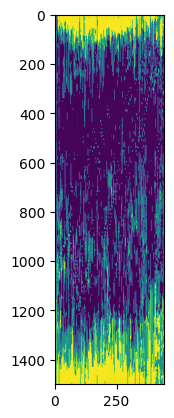

True

In [34]:
from matplotlib import pyplot as plt
print(total_matrix.shape)
plt.imshow(total_matrix.swapaxes(0,1))
plt.show()
# cv2.imwrite("output.png",total_matrix)
cv2.imwrite("output_greyscale2.bmp",total_matrix)

In [15]:
test = test.T